In [452]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [453]:
ds = pd.read_csv("lungcancer.csv")
ds.head(20)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [454]:
dsvalues = ds.values

x = dsvalues[:, 2:-1]
y = dsvalues[:, -1]

In [455]:
x_train = []
x_test = []
y_train = [] 
y_test = []

for i in range(5):
    x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, train_size=(1.0 - ((i+1)/10)), random_state=1)
    x_train.append(x_tr)
    x_test.append(x_ts)
    y_train.append(y_tr)
    y_test.append(y_ts)

In [456]:
# searching for the most accurate train size
gnb = GaussianNB()

print("Accuration rate:")
for i in range(5):
    gnb.fit(x_train[i], y_train[i])
    y_predict = gnb.predict(x_test[i])
    error = ((y_test[i] != y_predict).sum()/len(y_predict)*100)
    akurasi = str(100 - error) + "%"
    print(f"{(i+1)}. Train size {(1.0 - ((i+1)/10))} =", akurasi)

Accuration rate:
1. Train size 0.9 = 92.0%
2. Train size 0.8 = 93.5%
3. Train size 0.7 = 92.33333333333333%
4. Train size 0.6 = 91.75%
5. Train size 0.5 = 89.2%


# **Data Selection**
---

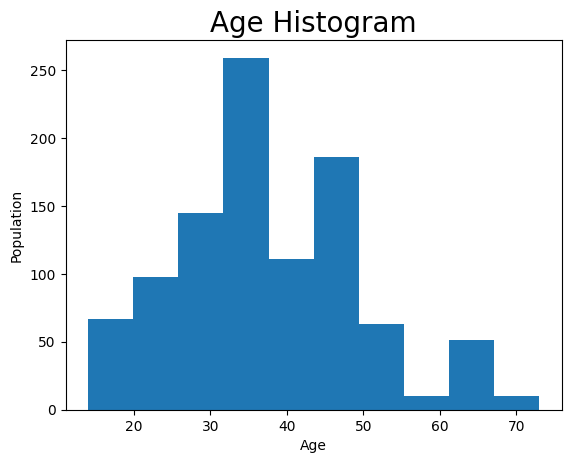

In [457]:
plt.hist(ds.Age)
plt.title("Age Histogram", fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Population")
plt.show()

In [458]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

In [459]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [460]:
ft = ds.columns[2:-1]
for i in range(len(fs.scores_)):
    print(str(i+1) + ". " + str(fs.scores_[i]) + " : " + ft[i])

1. 33.80951081995432 : Age
2. 3.707072029581903 : Gender
3. 391.48340154310654 : Air Pollution
4. 607.7889858856976 : Alcohol use
5. 311.91306084956665 : Dust Allergy
6. 320.8973447771809 : OccuPational Hazards
7. 384.6464320203249 : Genetic Risk
8. 217.07987589679297 : chronic Lung Disease
9. 441.94526075755374 : Balanced Diet
10. 568.5018335011316 : Obesity
11. 524.7565495695889 : Smoking
12. 581.5820761179205 : Passive Smoker
13. 405.6231641770068 : Chest Pain
14. 652.857842500815 : Coughing of Blood
15. 430.08907472262143 : Fatigue
16. 167.77236950472144 : Weight Loss
17. 262.2275798097217 : Shortness of Breath
18. 170.5553978379462 : Wheezing
19. 90.2144157005883 : Swallowing Difficulty
20. 201.0417638258517 : Clubbing of Finger Nails
21. 155.77718796926038 : Frequent Cold
22. 111.09616427140598 : Dry Cough
23. 73.03604341299217 : Snoring


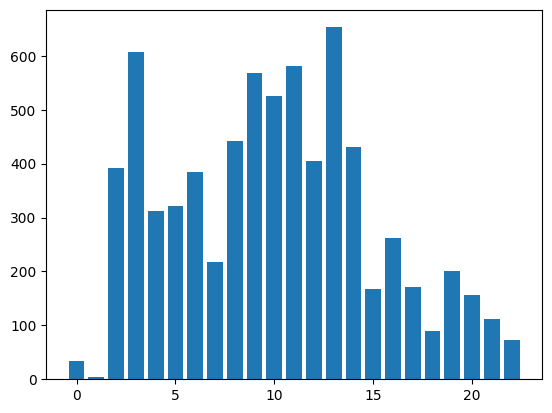

In [461]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# **Data Cleaning**
---

In [462]:
ds.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [463]:
# drop every column below 50 fs.scores_
dropcol = ["index", "Patient Id", "Age", "Gender"]
ds = ds.drop(dropcol, axis = 1)

In [464]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Air Pollution             1000 non-null   int64 
 1   Alcohol use               1000 non-null   int64 
 2   Dust Allergy              1000 non-null   int64 
 3   OccuPational Hazards      1000 non-null   int64 
 4   Genetic Risk              1000 non-null   int64 
 5   chronic Lung Disease      1000 non-null   int64 
 6   Balanced Diet             1000 non-null   int64 
 7   Obesity                   1000 non-null   int64 
 8   Smoking                   1000 non-null   int64 
 9   Passive Smoker            1000 non-null   int64 
 10  Chest Pain                1000 non-null   int64 
 11  Coughing of Blood         1000 non-null   int64 
 12  Fatigue                   1000 non-null   int64 
 13  Weight Loss               1000 non-null   int64 
 14  Shortness of Breath      

In [465]:
ds.isnull().sum()

Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [466]:
ds.head(20)

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,2,4,5,4,3,2,2,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,3,1,5,3,4,2,2,2,2,4,...,1,3,7,8,6,2,1,7,2,Medium
2,4,5,6,5,5,4,6,7,2,3,...,8,7,9,2,1,4,6,7,2,High
3,7,7,7,7,6,7,7,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,6,8,7,7,7,6,7,7,8,7,...,3,2,4,1,4,2,4,2,3,High
5,4,5,6,5,5,4,6,7,2,3,...,8,7,9,2,1,4,6,7,2,High
6,2,4,5,4,3,2,2,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,3,1,4,3,2,3,4,3,1,4,...,3,2,2,4,2,2,3,4,3,Low
8,4,5,6,5,6,5,5,5,6,6,...,1,4,3,2,4,6,2,4,1,Medium
9,2,3,4,2,4,3,3,3,2,3,...,1,2,4,6,5,4,2,1,5,Medium


In [467]:
ds.describe()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# **Data Mining**
---

In [468]:
dsvalues = ds.values

x = dsvalues[:, :-1]
y = dsvalues[:, -1]

In [469]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

In [470]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)
y_predict = gnb.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        High       0.91      0.99      0.95        76
         Low       1.00      0.92      0.96        62
      Medium       0.90      0.89      0.89        62

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



In [471]:
y_predict

array(['Medium', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'Low', 'High', 'Low', 'High',
       'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'Low',
       'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'Low',
       'High', 'Low', 'High', 'High', 'Medium', 'Medium', 'High', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'High', 'Medium', 'Low', 'Medium', 'High', 'High', 'Medium',
       'High', 'Medium', 'Medium', 'High', 'Medium', 'High', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'High', 'Medium', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low',